# <center>**Organización de Datos**

## <Center>**Trabajo Práctico 1** Real or Not? NLP with Disaster Tweets

**Objetivo:**  
El objetivo del primer TP es realizar un análisis exploratorio del set de datos. Queremos ver quécosas podemos descubrir sobre los datos que puedan resultar interesantes. Estas cosaspueden estar relacionadas al objetivo del TP2 (predecir si un cierto tweet es real o no) o no,ambas son de interés.

**A tener en cuenta:**

1.Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma seresponden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada?  
2. ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base alanálisis realizado? ¿Es interesante?


En esta notebook esta la mayoria del codigo para el tratamiento de valores nulos y algo de analisis de texto - 

In [2]:
# Importación general de librerías y de visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
! git clone https://github.com/gusper01/TP1FIUBA  #COMENTAR SI SE EJECUTA DESDE EL GITHUB DUPLICA EL REPO


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Cloning into 'TP1FIUBA'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 50 (delta 18), reused 29 (delta 5), pack-reused 0
Unpacking objects: 100% (50/50), done.


In [25]:
# Importación del set de datos
! ls  
#Comentar las siguientes 2 lineas si se ejecuta desde el github
train_raw = pd.read_csv('TP1FIUBA/train.csv')
train_raw2 = pd.read_csv('TP1FIUBA/train.csv')
#Comentar las siguientes 2 lineas si se ejecuta desde el colab
#train_raw = pd.read_csv('./train.csv')
#train_raw2 = pd.read_csv('./train.csv')

pd.options.display.max_colwidth = 150
train_raw.head(10)

sample_data  TP1FIUBA


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


#### Características del set de datos

In [4]:
train_raw.shape
print('Cantidad de Filas y Columnas:',train_raw.shape)

Cantidad de Filas y Columnas: (7613, 5)


In [5]:
train_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Text(0, 0.5, '')

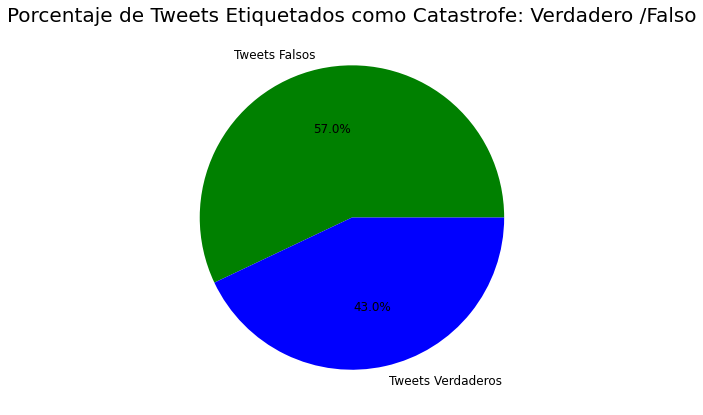

In [6]:

cuento_target=train_raw['target'].value_counts()
valor_target = ['Tweets Falsos', 'Tweets Verdaderos']
g_target = cuento_target.plot(kind='pie',labels=valor_target,figsize=(7,7),fontsize=12,colors=['green','blue'],autopct='%1.1f%%')


g_target.set_title("Porcentaje de Tweets Etiquetados como Catastrofe: Verdadero /Falso",fontsize=20)
g_target.set_ylabel("")


In [7]:
train_raw.loc[train_raw['target'] == 1, 'keyword'].isna().value_counts(normalize = True)

False    0.98716
True     0.01284
Name: keyword, dtype: float64

**Analisis de Valores nulos**

Text(0, 0.5, '')

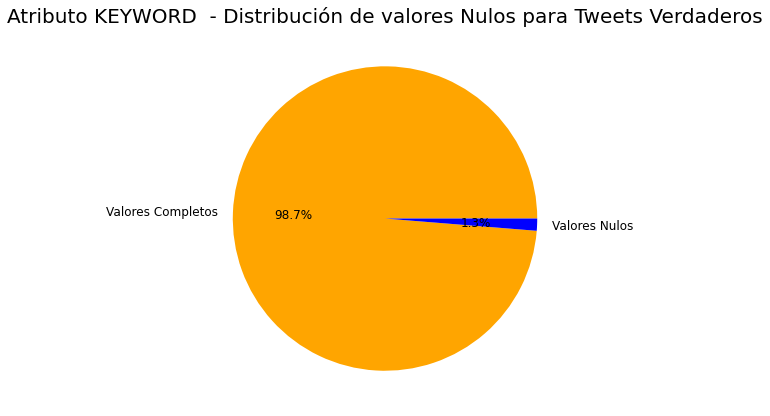

In [8]:
t = train_raw.loc[train_raw['target'] == 1, 'keyword'].isna().value_counts(normalize = True)
valor_target = ['Valores Completos', 'Valores Nulos']
g_target = t.plot(kind='pie',labels=valor_target,figsize=(7,7),fontsize=12, colors=['orange','blue'],autopct='%1.1f%%')
g_target.set_title("Atributo KEYWORD  - Distribución de valores Nulos para Tweets Verdaderos",fontsize=20)
g_target.set_ylabel("")


In [9]:
train_raw.loc[train_raw['target'] == 0, 'keyword'].isna().value_counts(normalize = True)

False    0.995624
True     0.004376
Name: keyword, dtype: float64

Text(0, 0.5, '')

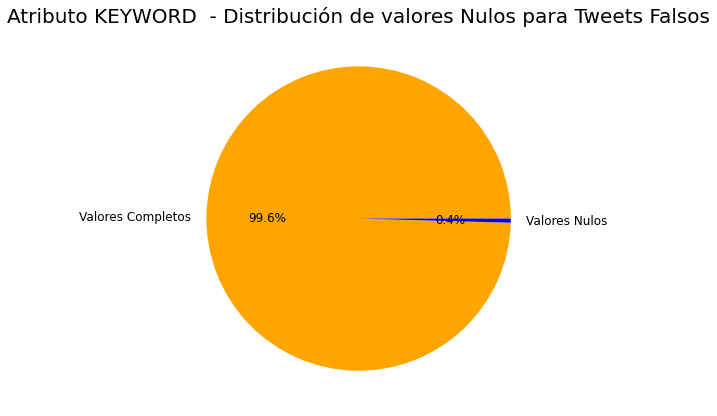

In [10]:
t = train_raw.loc[train_raw['target'] == 0, 'keyword'].isna().value_counts(normalize = True)
valor_target = ['Valores Completos', 'Valores Nulos']
g_target = t.plot(kind='pie',labels=valor_target,figsize=(7,7),fontsize=12, colors=['orange','blue'],autopct='%1.1f%%')
g_target.set_title("Atributo KEYWORD  - Distribución de valores Nulos para Tweets Falsos",fontsize=20)
g_target.set_ylabel("")

Text(0, 0.5, '')

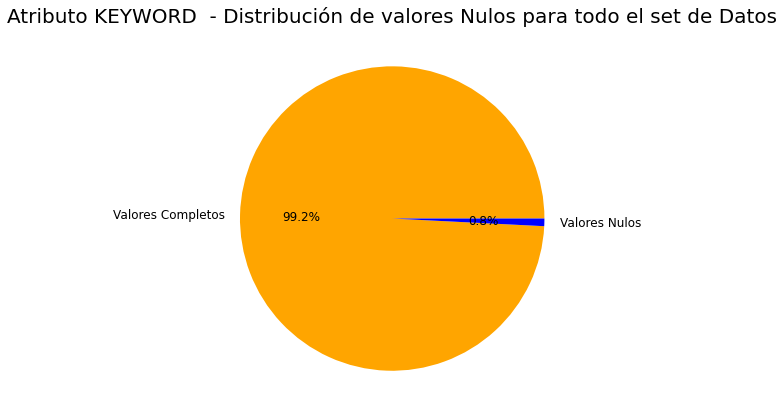

In [11]:
#t = train_raw.loc[train_raw['keyword'].isna().value_counts(normalize = True)
#t = train_raw.loc[train_raw('target', 'keyword').isna().value_counts(normalize = True)
t = train_raw['keyword'].isna().value_counts(normalize = True)
valor_target = ['Valores Completos', 'Valores Nulos']
g_target = t.plot(kind='pie',labels=valor_target,figsize=(7,7),fontsize=12, colors=['orange','blue'],autopct='%1.1f%%')
g_target.set_title("Atributo KEYWORD  - Distribución de valores Nulos para todo el set de Datos",fontsize=20)
g_target.set_ylabel("")

In [12]:
train_raw.loc[:, 'location'].isna().value_counts()

False    5080
True     2533
Name: location, dtype: int64

In [13]:
train_raw.loc[train_raw['target'] == 0, 'location'].isna().value_counts(normalize = True)

False    0.66421
True     0.33579
Name: location, dtype: float64

In [14]:
train_raw.loc[train_raw['target'] == 1, 'location'].isna().value_counts(normalize = True)

False    0.671354
True     0.328646
Name: location, dtype: float64

Text(0, 0.5, '')

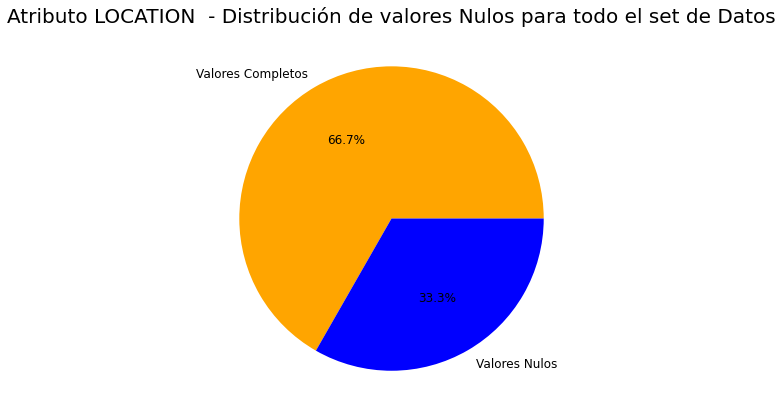

In [15]:
t = train_raw['location'].isna().value_counts(normalize = True)
valor_target = ['Valores Completos', 'Valores Nulos']
g_target = t.plot(kind='pie',labels=valor_target,figsize=(7,7),fontsize=12, colors=['orange','blue'],autopct='%1.1f%%')
g_target.set_title("Atributo LOCATION  - Distribución de valores Nulos para todo el set de Datos",fontsize=20)
g_target.set_ylabel("")

#### Limpieza del set de datos

In [16]:
train = train_raw.dropna(subset = ['keyword'])

train.head()


,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0


In [17]:
train_raw_sano = train_raw  #genero un dataframe reemplazando los NaN de Location x "vacio" y elimino las filas con Keyword NaN
train_raw_sano['location'].fillna("vacio", inplace = True)
train_raw_sano2 = train_raw_sano.dropna(axis=0, how='any')
train_raw_sano2 




,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0
...,...,...,...,...,...
7578,10830,wrecked,vacio,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty much all been wrecked hahaha shoutout to my family for that one,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/7enNulLKzM,0
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Lion gig tonight. Hearing is wrecked. http://t.co/oMNBAtJEAO,0


In [18]:
train_raw.info()
train_raw_sano2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7552 entries, 31 to 7582
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7552 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  7552 non-null   object
 3   text      7552 non-null   object
 4   target    7552 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 354.0+ KB


In [19]:
train_raw_sano2.count()

id          7552
keyword     7552
location    7552
text        7552
target      7552
dtype: int64

In [26]:
train_raw2.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

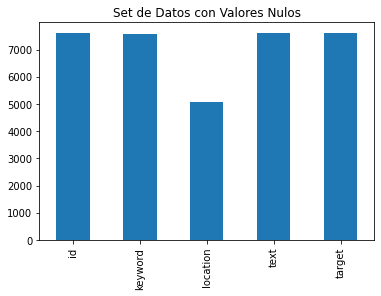

In [35]:
t = train_raw2.count() 
t.plot(kind='bar', title='Set de Datos con Valores Nulos')


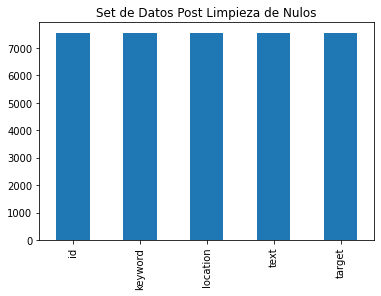

In [36]:
train_raw_sano2.count().plot(kind='bar', title ='Set de Datos Post Limpieza de Nulos')

#### Análisis cantidad de palabras

In [0]:
train_words_qy = train.merge(train['text'].map(lambda x: len(x.split())), on = train['id'], how = 'inner')
train_words_qy.drop(columns = ['key_0'], inplace = True)
train_words_qy.rename(columns = {'text_x':'text', 'text_y':'words_qy'}, inplace = True)
train_words_qy.head()

,id,keyword,location,text,target,words_qy
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,5
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,10
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,9
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,7
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0,13


In [0]:
train_words_qy.groupby('target')['words_qy'].agg(['mean', 'max', 'min'])

,mean,max,min
target,,,
0,14.750867,31,1
1,15.174048,30,2


In [0]:
def f(lista):
    serie = pd.Series(lista)
    serie_filtrada = serie.str.findall(r'^[a-zA-Z0-9]*$')
    return ' '.join(serie_filtrada.str.join('').tolist())
    
train_text_clean = (train['text'].map(lambda x: x.split())).map(lambda x: f(x))
train_text_clean.head(10)

31                                                                       Wholesale Markets ablaze 
32                                                                  We always try to bring the    
33                                                                  Breaking  flag set ablaze in  
34                                                                   Crying out for  Set me ablaze
35                                          On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE 
36       built so much hype around new acquisitions but I doubt they will set the EPL ablaze this 
37                                                                INEC Office in Abia Set Ablaze  
38                  Barbados  JAMAICA  Two cars set  SANTA CRUZ  Head of the St Elizabeth Police  
39                                                                            Ablaze for you Lord 
40                                                                               Check these      
Name: text

In [0]:
train_clean_text = train.merge(train_text_clean, on = train.index, how = 'inner').drop(columns = 'key_0')
train_clean_text.rename(columns = {'text_x':'text', 'text_y':'clean_text'}, inplace = True)
train_clean_text.head()

,id,keyword,location,text,target,clean_text
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,Wholesale Markets ablaze
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,We always try to bring the
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,Breaking flag set ablaze in
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,Crying out for Set me ablaze
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE


In [0]:
train_clean_text_words_qy = train_clean_text.merge(train_clean_text['clean_text'].map(lambda x: len(x.split())), on = train_clean_text['id'], how = 'inner')
train_clean_text_words_qy.drop(columns = ['key_0', 'text'], inplace = True)
train_clean_text_words_qy.rename(columns = {'clean_text_x':'clean_text', 'clean_text_y':'words_qy'}, inplace = True)
train_clean_text_words_qy.head()

,id,keyword,location,target,clean_text,words_qy
0,48,ablaze,Birmingham,1,Wholesale Markets ablaze,3
1,49,ablaze,Est. September 2012 - Bristol,0,We always try to bring the,6
2,50,ablaze,AFRICA,1,Breaking flag set ablaze in,5
3,52,ablaze,"Philadelphia, PA",0,Crying out for Set me ablaze,6
4,53,ablaze,"London, UK",0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,12


In [0]:
train_clean_text_words_qy.groupby('target')['words_qy'].agg(['mean', 'max', 'min'])

,mean,max,min
target,,,
0,11.469119,30,0
1,11.666770,28,0


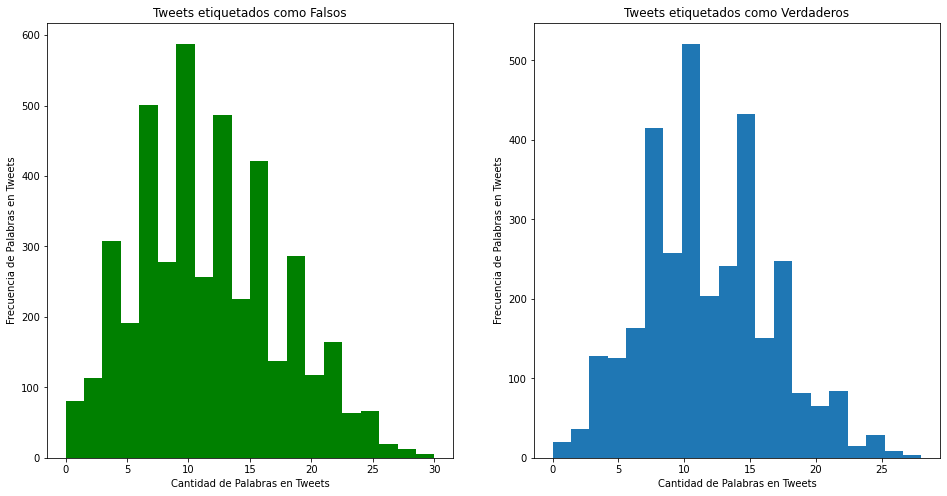

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
ax1.hist(train_clean_text_words_qy.groupby('target').get_group(0)['words_qy'], bins = 20, facecolor='g')
ax1.set_title('Tweets etiquetados como Falsos')
ax1.set_xlabel('Cantidad de Palabras en Tweets')
ax1.set_ylabel('Frecuencia de Palabras en Tweets')

ax2.hist(train_clean_text_words_qy.groupby('target').get_group(1)['words_qy'], bins = 20)
ax2.set_title('Tweets etiquetados como Verdaderos')
ax2.set_xlabel('Cantidad de Palabras en Tweets')
ax2.set_ylabel('Frecuencia de Palabras en Tweets')

plt.show()